# Zyfra Gold Mining

Using the data on extraction and purification, this project will prepare a 
machine learning model that should predict the amount of gold recovered from gold ore.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#General-Information" data-toc-modified-id="General-Information-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>General Information</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Preprocessing</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Data-Analysis" data-toc-modified-id="Data-Analysis-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Analysis</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Model-Building" data-toc-modified-id="Model-Building-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Model Building</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Conclusion</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></li><li><span><a href="#Final-Conclusion" data-toc-modified-id="Final-Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Final Conclusion</a></span></li></ul></div>

## General Information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
import numpy as np

gold_train=pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test= pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full= pd.read_csv('/datasets/gold_recovery_full.csv')

df = gold_train,gold_test,gold_full
for i in df:
    display(i.head())
    display(i.describe())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


### Conclusion
Using pandas function pd.read_csv() the datasets were loaded. Describe() was called to check for any extreme values in each dataset. Looking at the dataset, there  is some preprocessing needed before carrying out the model testing.

## Data Preprocessing

In [2]:
def data_pre(d,name):
    print('Dataset:',name)
    print('\n Null values:',d.isnull().sum().sum())
    df = d.dropna()
    print('\n New Null values:',df.isnull().sum().sum(),'\n')
    dup = df[df.duplicated()].sum()
    print('Duplicated values:',df.groupby(dup).sum(),'\n\n')
    return df
gold_train_x = data_pre(gold_train, 'gold_train')
gold_test_x = data_pre(gold_test,'gold_test')
gold_full_x = data_pre(gold_full, 'gold_full')



Dataset: gold_train

 Null values: 30320

 New Null values: 0 

Duplicated values: Empty DataFrame
Columns: [final.output.concentrate_ag, final.output.concentrate_pb, final.output.concentrate_sol, final.output.concentrate_au, final.output.recovery, final.output.tail_ag, final.output.tail_pb, final.output.tail_sol, final.output.tail_au, primary_cleaner.input.sulfate, primary_cleaner.input.depressant, primary_cleaner.input.feed_size, primary_cleaner.input.xanthate, primary_cleaner.output.concentrate_ag, primary_cleaner.output.concentrate_pb, primary_cleaner.output.concentrate_sol, primary_cleaner.output.concentrate_au, primary_cleaner.output.tail_ag, primary_cleaner.output.tail_pb, primary_cleaner.output.tail_sol, primary_cleaner.output.tail_au, primary_cleaner.state.floatbank8_a_air, primary_cleaner.state.floatbank8_a_level, primary_cleaner.state.floatbank8_b_air, primary_cleaner.state.floatbank8_b_level, primary_cleaner.state.floatbank8_c_air, primary_cleaner.state.floatbank8_c_level, 

In [3]:

c = gold_train_x['rougher.output.concentrate_au']

f = gold_train_x['rougher.input.feed_au']

t = gold_train_x['rougher.output.tail_au']

recovery= (c * (f - t) / (f * (c - t)))*100 


mae = mean_absolute_error(gold_train_x['rougher.output.recovery'],recovery)

print('MAE between calculated and expected recovery:',mae)



differences = list(set(gold_train_x.columns)-set(gold_test_x.columns))
print('\nFeatures not avaliable in the test set:\n\n',differences)

MAE between calculated and expected recovery: 9.555596961987514e-15

Features not avaliable in the test set:

 ['rougher.calculation.sulfate_to_au_concentrate', 'final.output.concentrate_au', 'rougher.output.concentrate_au', 'rougher.calculation.au_pb_ratio', 'final.output.tail_au', 'primary_cleaner.output.concentrate_sol', 'secondary_cleaner.output.tail_sol', 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_au', 'rougher.output.recovery', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_sol', 'primary_cleaner.output.tail_pb', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'final.output.concentrate_ag', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_au', 'final.output.tail_sol', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol', 'final.output.tail_ag', 'secondary_cleaner.output.tail_ag', 'final.output.tail_pb', '

### Conclusion
First the data needed to be preprocessed. There were missing values as indicated by the isnull() function so they had to be removed. Then the duplicated function was used to check if there was any data that had been put in there more than once. This returned an empty dataframe, thus there was no such error.

Then to check that recovery is calculated correctly, I performed the reovery formula and found the MAE between the calculated and feature values of recovery. The MAE shows the average magnitude of the errors in a set of forecasts, thus, the result of 9.55e-15 shows the average magnitude of errors in the forecast is 9.55e-15, which is very small. The magnitude of errors is negligible.

The features not avaliable in the test set is typically output and calculation parameter types.

## Data Analysis


  Metal:  Pb 


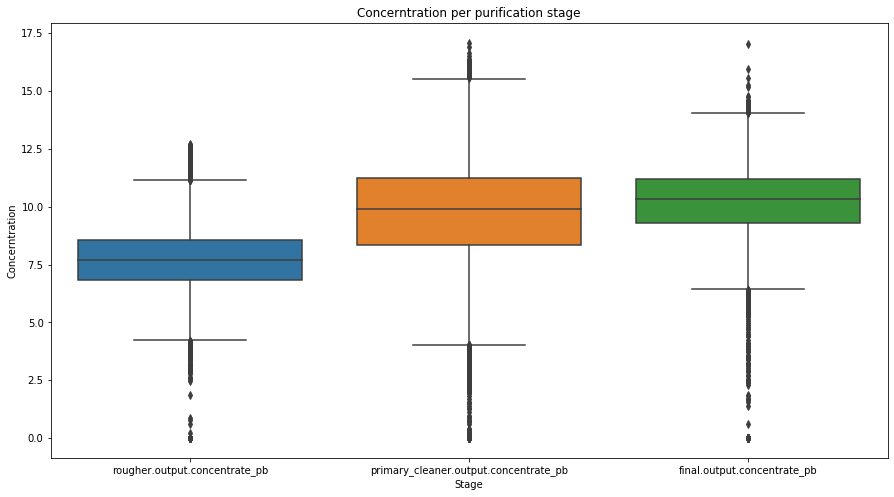

,rougher.output.concentrate_pb,primary_cleaner.output.concentrate_pb,final.output.concentrate_pb
count,11017.000000,11017.000000,11017.000000
mean,7.612323,9.574924,10.172687
std,1.718284,2.538084,1.589666
min,0.000000,0.000000,0.000000
25%,6.819439,8.351604,9.279625
50%,7.708693,9.919856,10.347530
75%,8.547192,11.226037,11.187018
max,12.702148,17.081278,17.031899



  Metal:  Au 


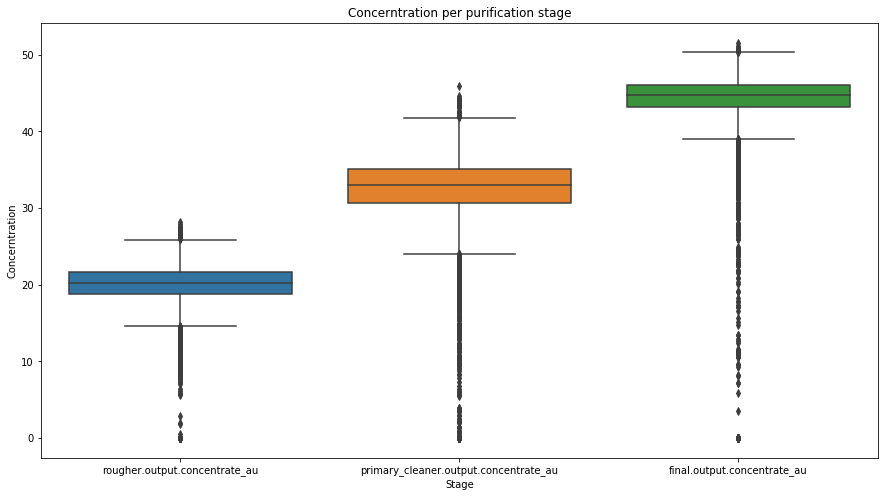

,rougher.output.concentrate_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au
count,11017.000000,11017.000000,11017.000000
mean,19.776788,32.380986,44.131636
std,3.600455,5.328369,4.171270
min,0.000000,0.000000,0.000000
25%,18.835324,30.705889,43.243792
50%,20.262237,33.017232,44.802196
75%,21.662943,35.154232,46.092315
max,28.146838,45.933934,51.571885



  Metal:  Ag 


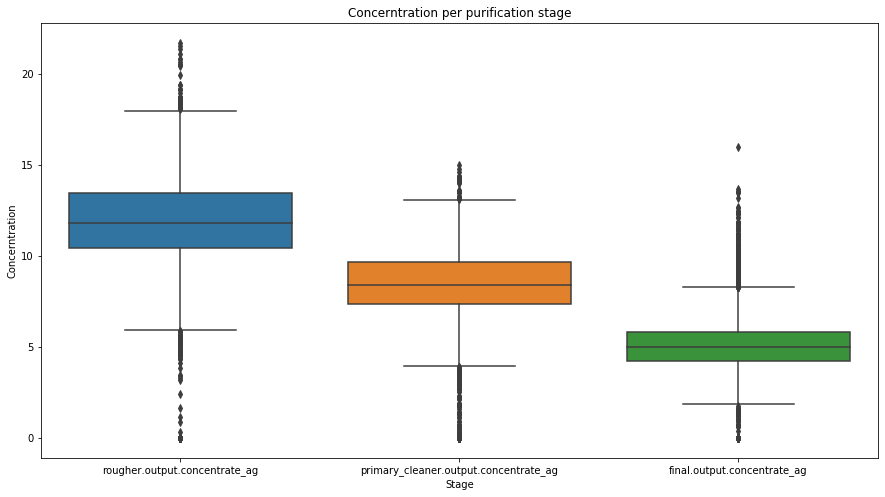

,rougher.output.concentrate_ag,primary_cleaner.output.concentrate_ag,final.output.concentrate_ag
count,11017.000000,11017.000000,11017.000000
mean,11.841982,8.437251,5.156333
std,2.686593,1.888580,1.340491
min,0.000000,0.000000,0.000000
25%,10.460493,7.383838,4.231103
50%,11.797794,8.436412,4.999314
75%,13.494582,9.683331,5.852710
max,21.725695,15.005789,16.001945


In [4]:


rougher_pb = gold_train_x['rougher.output.concentrate_pb']
primary_pb = gold_train_x['primary_cleaner.output.concentrate_pb']
final_pb = gold_train_x['final.output.concentrate_pb']

pb_change =rougher_pb,primary_pb,final_pb

rougher_au = gold_train_x['rougher.output.concentrate_au']
primary_au = gold_train_x['primary_cleaner.output.concentrate_au']
final_au = gold_train_x['final.output.concentrate_au']

au_change = rougher_au,primary_au,final_au

rougher_ag = gold_train_x['rougher.output.concentrate_ag']
primary_ag = gold_train_x['primary_cleaner.output.concentrate_ag']
final_ag = gold_train_x['final.output.concentrate_ag']

ag_change = rougher_ag,primary_ag,final_ag

def visuals(metal,name):
    print('\n','\033[1m','Metal: ',name,'\033[0m')
    df_ = pd.DataFrame(metal).transpose()
    plt.figure(figsize=(15,8))
    sns.boxplot(data=df_)
    plt.xlabel('Stage')
    plt.ylabel('Concerntration')
    plt.title('Concerntration per purification stage')
    plt.show()
    display(df_.describe())

visuals(pb_change,'Pb')
visuals(au_change,'Au')
visuals(ag_change,'Ag')

### Conclusion
With Pb concerntration increases at each stage. The boxplot shows that at first stage the mean concerntration is at 7.6 .This increases to 9.5 at primary cleaner and 10.1 at final output. At the final output stage there are alot, of left tail outliers that could mean concerntration can fall however, this is not the majority of values. For Au the boxplot shows a strict and clear increase in concerntration per purification stage. Although at the final stage, as noted before there are alot of left tail outliers. With Ag, concerntration per purfication stage decreases. The rougher output has the highest concerntration at 11.8 
but this decreases with each subsequent stage to end up with 5.1 at the final output.

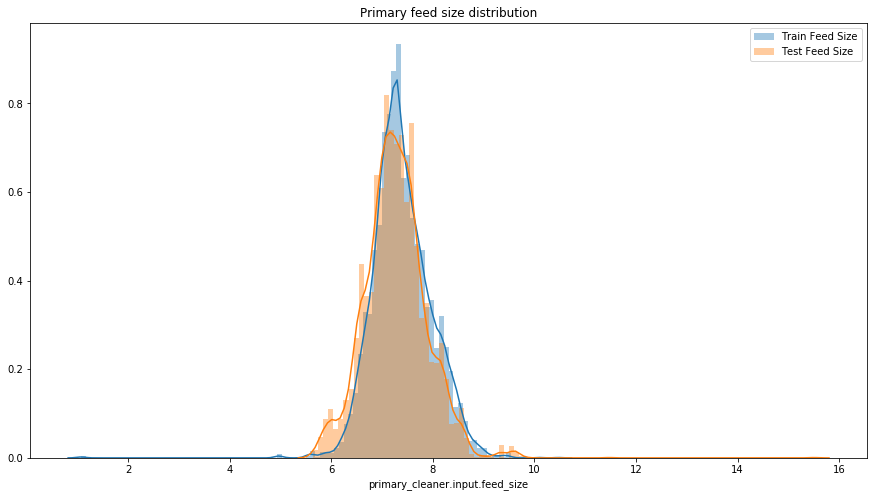

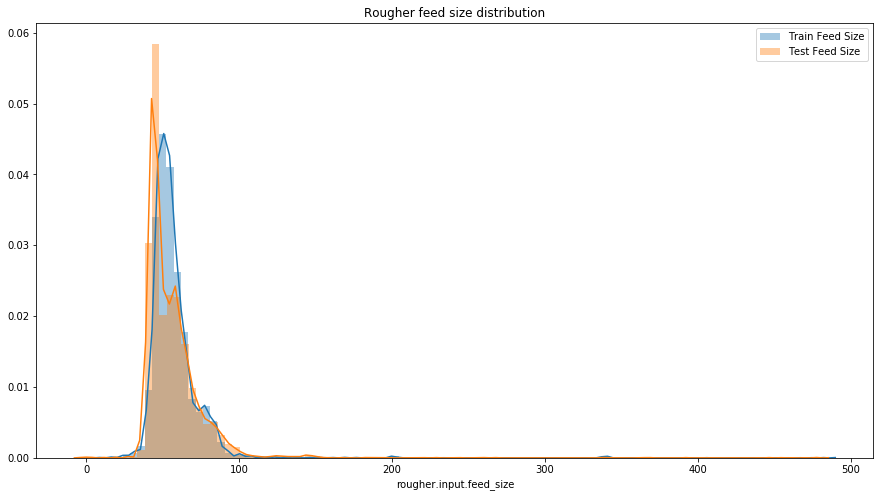

In [5]:
 
x = gold_train_x.loc[:, gold_train_x.columns.str.contains('feed_size')]
y = gold_test_x.loc[:, gold_test_x.columns.str.contains('feed_size')] 

def hist(train,test,name):
    plt.figure(figsize=(15,8))
    sns.distplot(train,bins=100,norm_hist=True,label='Train Feed Size')
    sns.distplot(test,bins=100,norm_hist=True, label='Test Feed Size')
    plt.title(name+ ' feed size distribution')
    plt.legend(loc='upper right')
    plt.show();
    
hist(x.iloc[:,0],y.iloc[:,0],'Primary')
hist(x.iloc[:,1],y.iloc[:,1],'Rougher')

### Conclusion
Distributions of the feed size in the test and training set are similar. Also the histogram graphs shows the distribution around the values 6,8,10 for primary cleaner in the test set mirrors the training set. The distribution between 0 to 100 in the rougher input training set mirrors the distribution in the test set.

<div class="alert alert-danger">
    <s>The histograms need to be normalized. It would also be nice to put the histograms of the train set and the test set on the same axis for easier comparison.
</div>

<div class="alert alert-success">
    <b>V2.</b>
    Great!
</div>

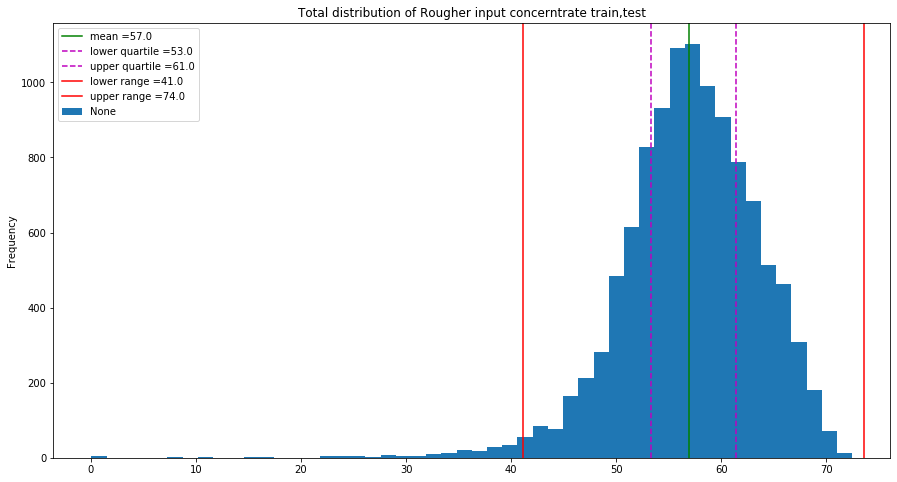

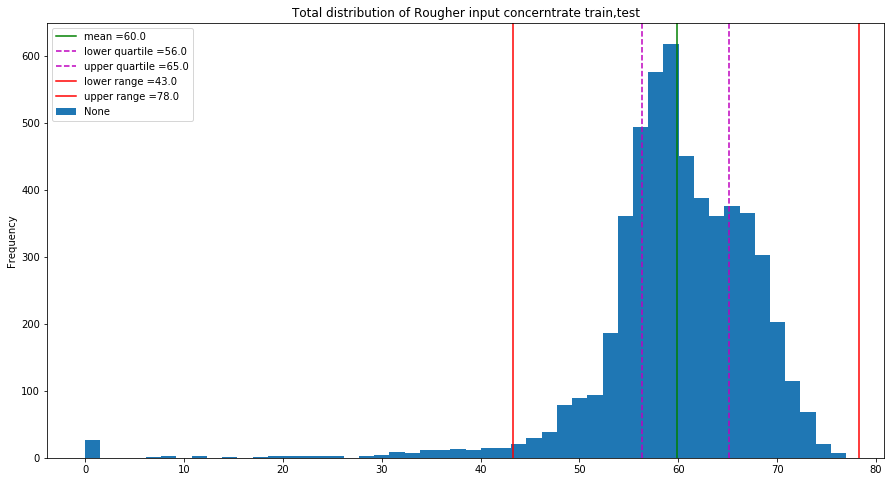

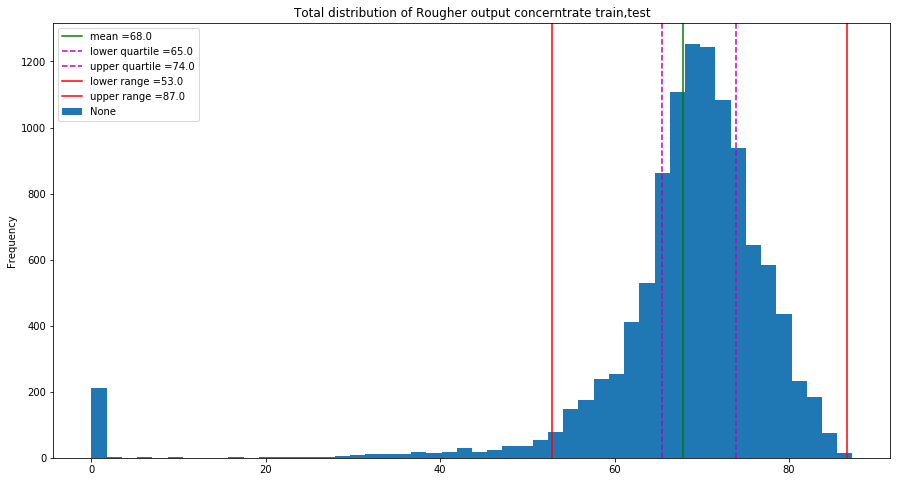

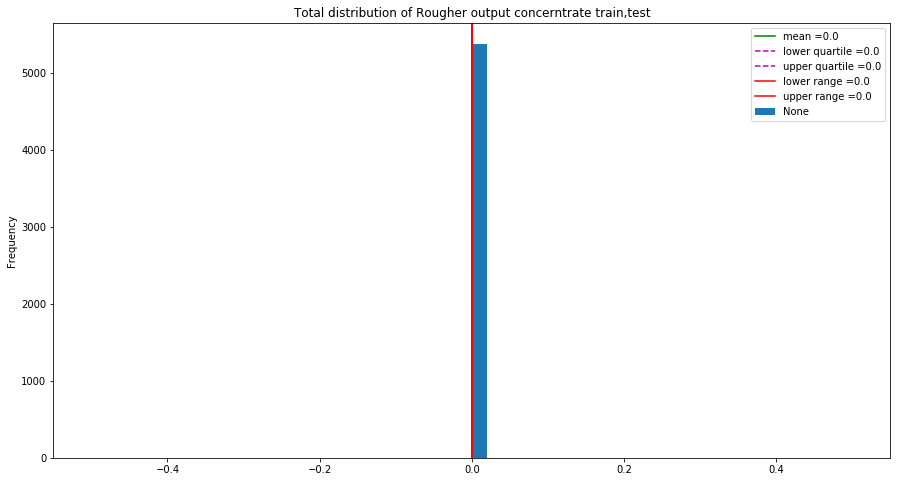

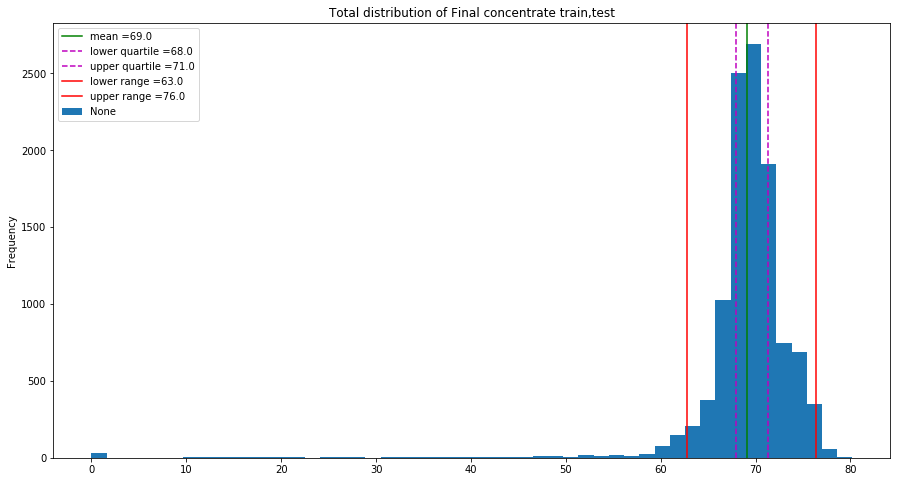

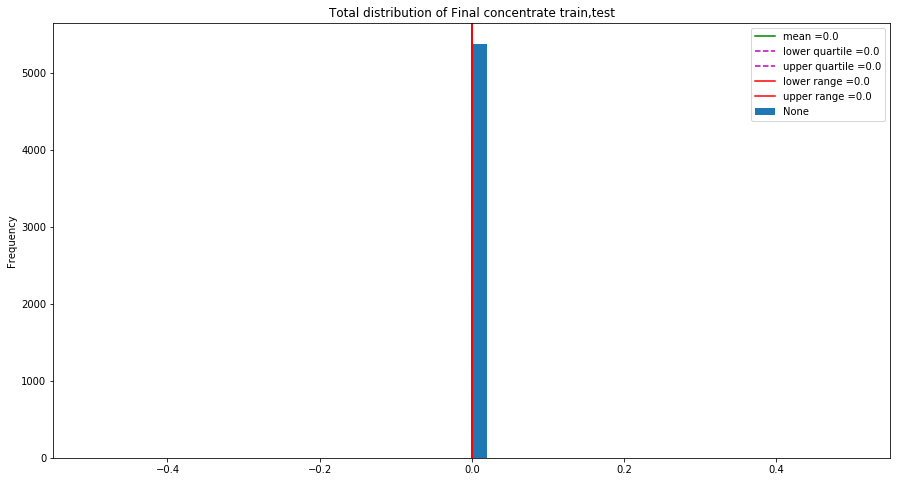

In [6]:
 #You need to look at each stage and calculate the total concentration of all metals at that stage

l = ['feed_au','feed_pb','feed_ag','feed_sol']  
r = '|'.join(l)
df = gold_train_x,gold_test_x
def total_d(t,namess):
    for d in df:
        con = d.loc[:, d.columns.str.contains(t)].sum(axis=1)
        plt.figure(figsize=(15,8))
        con.plot(kind='hist',bins=50)
        describe = con.describe()
        mean = describe[1]
        lower = describe[4]
        upper = describe[6]
        IQR = upper - lower
        iqr_l = lower - (1.5 * IQR)
        iqr_u = upper + (1.5 * IQR)
        descriptive = mean,lower,upper, iqr_l,iqr_u
        names = 'mean','lower quartile','upper quartile', 'lower range','upper range'
        colours = 'g','m','m','r','r'
        line = '-','--','--','-','-'
        for i,x,c,l in zip(descriptive, names,colours,line):
                name = '{}'.format(x)
                plt.axvline(x=i,color=c, linestyle=l, label='{} {}{}'.format(name,'=', i.round()))
        plt.title('Total distribution of ' + namess)
        plt.legend();
        plt.show()
    
total_d(r,'Rougher input concerntrate train,test')
total_d('rougher.output.concentrate','Rougher output concerntrate train,test')
total_d('final.output.concentrate','Final concentrate train,test')

### Conclusion
Although the test set has no values for final concerntrate or rougher output concerntrate, with rougher input concerntrate it follows a similar distribution to the training set, which is good for the model building. The red lines show anomlies as there are vvalues that lie outside the IQR. 

## Model Building

In [7]:
gold_test_x = gold_test_x.merge(gold_full_x[['date', 'final.output.recovery', 'rougher.output.recovery']], 
                        how='left', on='date')
print(gold_test_x.isnull().sum())
gold_test_x.dropna(subset=['final.output.recovery', 'rougher.output.recovery'], inplace=True)
print(gold_test_x.isnull().sum())



date                                            0
primary_cleaner.input.sulfate                   0
primary_cleaner.input.depressant                0
primary_cleaner.input.feed_size                 0
primary_cleaner.input.xanthate                  0
primary_cleaner.state.floatbank8_a_air          0
primary_cleaner.state.floatbank8_a_level        0
primary_cleaner.state.floatbank8_b_air          0
primary_cleaner.state.floatbank8_b_level        0
primary_cleaner.state.floatbank8_c_air          0
primary_cleaner.state.floatbank8_c_level        0
primary_cleaner.state.floatbank8_d_air          0
primary_cleaner.state.floatbank8_d_level        0
rougher.input.feed_ag                           0
rougher.input.feed_pb                           0
rougher.input.feed_rate                         0
rougher.input.feed_size                         0
rougher.input.feed_sol                          0
rougher.input.feed_au                           0
rougher.input.floatbank10_sulfate               0


In [8]:

def smape(target,predict):
    return (np.abs(target - predict)/((np.abs(target)+np.abs(predict))/2)).mean()
def smape_final(target,predict):
    smape_r= smape(target[:,0],predict[:,0])
    smape_f= smape(target[:,1],predict[:,1])
    return 0.25*smape_r + 0.75*smape_f


In [9]:

from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

target = ['rougher.output.recovery', 'final.output.recovery']


features = list(set(gold_train_x.columns).intersection(set(gold_test_x.columns)- set(target)))
featuress = [col for col in features if col != 'date']

features_train, features_test = gold_train_x[featuress].values, gold_test_x[featuress].values
target_train, target_test = gold_train_x[target].values, gold_test_x[target].values


### Conclusion

In order to do the model testing, need to merge the test set with the full set, as the test set is missing the target variables. Insull() function is used just to affirm there are no missing values. To write a calcuation of the sMAPE value a first function is created to get the calcucation for each stage, rougher and final. This first function is put within a second function to then complete the calculation by applying its respective proportions. The calculation relies on the variables actual and predicted values.

In [10]:
model_l = LinearRegression()

dummy= DummyRegressor(strategy="mean")

print('Five K-Fold Cross Validation:')
def evalu(m):
    model = m
    smape_score=make_scorer(smape_final)
    score = cross_val_score(model, features_train, target_train, cv=5,scoring=smape_score) 
    value = "{:.3f}".format(np.mean(score))
    return value

print('LR Mean Cross-Validation Score:',evalu(model_l))
print('Dummy Mean Cross-Validation Score:',evalu(dummy))

for depth in range(1,11,1):
    models= RandomForestRegressor(random_state=12345,n_estimators=50,max_depth=depth)
    ev = evalu(models)
    print('RF depth {} , mean score {}'.format(depth,ev))

Five K-Fold Cross Validation:
LR Mean Cross-Validation Score: 0.103
Dummy Mean Cross-Validation Score: 0.104
RF depth 1 , mean score 0.098
RF depth 2 , mean score 0.091
RF depth 3 , mean score 0.090
RF depth 4 , mean score 0.093
RF depth 5 , mean score 0.095
RF depth 6 , mean score 0.098
RF depth 7 , mean score 0.102
RF depth 8 , mean score 0.103
RF depth 9 , mean score 0.106
RF depth 10 , mean score 0.105


### Conclusion
As the target values are not binary, regression needs to be used hence Random Forest Regression and Linear Regression.
These models are fitted using the training data. To calculate the cross validation score, the metric cross_val_score was used. Within that the scoring parameter was used. Using the make_scorer import this  takes a score function, such as the sMAPE score
and returns a object that scores the estimator’s output. The peformance of Random Forest regressor using this parameter exceeds 
the linear regression model at depth 9 estimator 50 with a mean score of 0.106. Thus, this exceeds the mean score for the dummy set, 0.104. Random forest is the best model from the 5 cross validation average.

In [12]:
model_r = RandomForestRegressor(random_state=12345,n_estimators=50,max_depth=9)

dummy.fit(features_train, target_train)
dummy_smape = smape_final(target_test,dummy.predict(features_test))
print('Dummy Final sMAPE:',dummy_smape)

model_r.fit(features_train, target_train)
final = smape_final(target_test,model_r.predict(features_test))
print('Random Regressor Final sMAPE:',final)

Dummy Final sMAPE: 0.0912200538408731
Random Regressor Final sMAPE: 0.089992248580511


### Conclusion
Using random forest regression with depth 9 estimator 50, the final sMAPE value is 0.089 for the test set. Since sMAPE is accuracy measure based on relative errors, the model is an accurate prediction of the coefficient and is lower than the sMAPE value for the dummy set.

## Final Conclusion

To conclude, Zyfra should use Random Forest Regressor model (depth 10,estimator 50) to predict the amount of gold recovered from gold ore. The final sMAPE value highlights that it is an accurate predictor of gold recovery as it shows the relative errors between the acutal and predicted recovery is small.